# Law of large numbers

## Failure in practice

The [law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) says that as you sample and average from a distribution, the average will tend toward a stable value. As the average tends toward a stable value, the deviation in the averages should also stabilise. However, it does not stabilise for fat-tailed distributions even with many samples.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.pylab  as pylab  

import numpy as np
import scipy.stats

from mpl_toolkits.mplot3d import Axes3D

params = {
    "legend.fontsize" : "xx-large",
    "axes.labelsize"  : "xx-large",
    "axes.titlesize"  : "xx-large",
    "xtick.labelsize" : "xx-large",
    "ytick.labelsize" : "xx-large"
}

pylab.rcParams.update(params)

In [3]:
def mad(data):
    mean = np.mean(data)
    
    absolute_deviations = np.abs(data - mean)
    
    return np.mean(absolute_deviations)

In [4]:
def sample_and_plot_deviation(
        num_samples,
        distribution,
        distribution_name
    ):
        average = 0
        
        averages = [average]
        
        deviations = [0]
        
        sample = 0
        
        for n in range(num_samples):
            average = ( average + distribution() ) / (n + 2)
            
            averages.append(average)
            
            deviations.append( mad(averages) )
        
        plt.plot(deviations)
        plt.xlabel("Samples")
        plt.ylabel("Mean absolute deviation")
        plt.xlim(0, num_samples)
        plt.ylim(0, np.amax(deviations) * 1.01)
        plt.title("Sampling from " + distribution_name + " distribution")

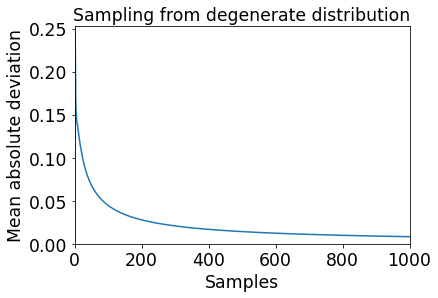

In [10]:
sample_and_plot_deviation(1_000, lambda : 1, "degenerate")

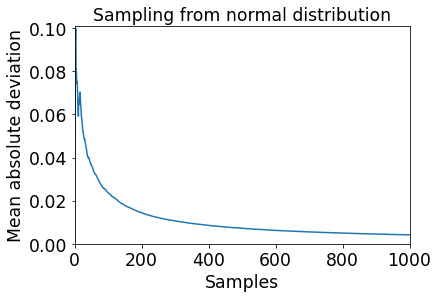

In [11]:
sample_and_plot_deviation(1_000, scipy.stats.norm.rvs, "normal")

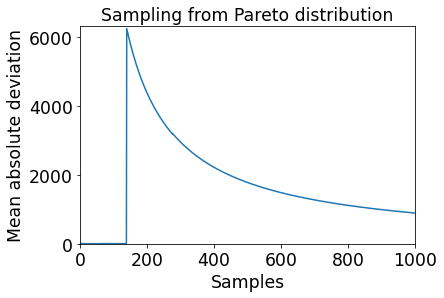

In [25]:
sample_and_plot_deviation(1_000, lambda : scipy.stats.pareto.rvs(b=0.5), "Pareto")